In this notebook we compute the $ r\alpha $ and $ r\mathrm{\overline{TSE}} $ for the Stationary Concentrated Vortex Model (SCVM) from:

Onishchenko, O., Fedun, V., Horton, W., Pokhotelov, O., Astafieva, N., Skirvin, S. J., & Verth, G. (2021). 
The Stationary Concentrated Vortex Model. Climate, 9(3), 39. https://doi.org/10.3390/cli9030039

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
# Define colormapping 'parula'
from matplotlib.colors import LinearSegmentedColormap
cm_data = [[0.2422, 0.1504, 0.6603],
[0.2444, 0.1534, 0.6728],
[0.2464, 0.1569, 0.6847],
[0.2484, 0.1607, 0.6961],
[0.2503, 0.1648, 0.7071],
[0.2522, 0.1689, 0.7179],
[0.254, 0.1732, 0.7286],
[0.2558, 0.1773, 0.7393],
[0.2576, 0.1814, 0.7501],
[0.2594, 0.1854, 0.761],
[0.2611, 0.1893, 0.7719],
[0.2628, 0.1932, 0.7828],
[0.2645, 0.1972, 0.7937],
[0.2661, 0.2011, 0.8043],
[0.2676, 0.2052, 0.8148],
[0.2691, 0.2094, 0.8249],
[0.2704, 0.2138, 0.8346],
[0.2717, 0.2184, 0.8439],
[0.2729, 0.2231, 0.8528],
[0.274, 0.228, 0.8612],
[0.2749, 0.233, 0.8692],
[0.2758, 0.2382, 0.8767],
[0.2766, 0.2435, 0.884],
[0.2774, 0.2489, 0.8908],
[0.2781, 0.2543, 0.8973],
[0.2788, 0.2598, 0.9035],
[0.2794, 0.2653, 0.9094],
[0.2798, 0.2708, 0.915],
[0.2802, 0.2764, 0.9204],
[0.2806, 0.2819, 0.9255],
[0.2809, 0.2875, 0.9305],
[0.2811, 0.293, 0.9352],
[0.2813, 0.2985, 0.9397],
[0.2814, 0.304, 0.9441],
[0.2814, 0.3095, 0.9483],
[0.2813, 0.315, 0.9524],
[0.2811, 0.3204, 0.9563],
[0.2809, 0.3259, 0.96],
[0.2807, 0.3313, 0.9636],
[0.2803, 0.3367, 0.967],
[0.2798, 0.3421, 0.9702],
[0.2791, 0.3475, 0.9733],
[0.2784, 0.3529, 0.9763],
[0.2776, 0.3583, 0.9791],
[0.2766, 0.3638, 0.9817],
[0.2754, 0.3693, 0.984],
[0.2741, 0.3748, 0.9862],
[0.2726, 0.3804, 0.9881],
[0.271, 0.386, 0.9898],
[0.2691, 0.3916, 0.9912],
[0.267, 0.3973, 0.9924],
[0.2647, 0.403, 0.9935],
[0.2621, 0.4088, 0.9946],
[0.2591, 0.4145, 0.9955],
[0.2556, 0.4203, 0.9965],
[0.2517, 0.4261, 0.9974],
[0.2473, 0.4319, 0.9983],
[0.2424, 0.4378, 0.9991],
[0.2369, 0.4437, 0.9996],
[0.2311, 0.4497, 0.9995],
[0.225, 0.4559, 0.9985],
[0.2189, 0.462, 0.9968],
[0.2128, 0.4682, 0.9948],
[0.2066, 0.4743, 0.9926],
[0.2006, 0.4803, 0.9906],
[0.195, 0.4861, 0.9887],
[0.1903, 0.4919, 0.9867],
[0.1869, 0.4975, 0.9844],
[0.1847, 0.503, 0.9819],
[0.1831, 0.5084, 0.9793],
[0.1818, 0.5138, 0.9766],
[0.1806, 0.5191, 0.9738],
[0.1795, 0.5244, 0.9709],
[0.1785, 0.5296, 0.9677],
[0.1778, 0.5349, 0.9641],
[0.1773, 0.5401, 0.9602],
[0.1768, 0.5452, 0.956],
[0.1764, 0.5504, 0.9516],
[0.1755, 0.5554, 0.9473],
[0.174, 0.5605, 0.9432],
[0.1716, 0.5655, 0.9393],
[0.1686, 0.5705, 0.9357],
[0.1649, 0.5755, 0.9323],
[0.161, 0.5805, 0.9289],
[0.1573, 0.5854, 0.9254],
[0.154, 0.5902, 0.9218],
[0.1513, 0.595, 0.9182],
[0.1492, 0.5997, 0.9147],
[0.1475, 0.6043, 0.9113],
[0.1461, 0.6089, 0.908],
[0.1446, 0.6135, 0.905],
[0.1429, 0.618, 0.9022],
[0.1408, 0.6226, 0.8998],
[0.1383, 0.6272, 0.8975],
[0.1354, 0.6317, 0.8953],
[0.1321, 0.6363, 0.8932],
[0.1288, 0.6408, 0.891],
[0.1253, 0.6453, 0.8887],
[0.1219, 0.6497, 0.8862],
[0.1185, 0.6541, 0.8834],
[0.1152, 0.6584, 0.8804],
[0.1119, 0.6627, 0.877],
[0.1085, 0.6669, 0.8734],
[0.1048, 0.671, 0.8695],
[0.1009, 0.675, 0.8653],
[0.0964, 0.6789, 0.8609],
[0.0914, 0.6828, 0.8562],
[0.0855, 0.6865, 0.8513],
[0.0789, 0.6902, 0.8462],
[0.0713, 0.6938, 0.8409],
[0.0628, 0.6972, 0.8355],
[0.0535, 0.7006, 0.8299],
[0.0433, 0.7039, 0.8242],
[0.0328, 0.7071, 0.8183],
[0.0234, 0.7103, 0.8124],
[0.0155, 0.7133, 0.8064],
[0.0091, 0.7163, 0.8003],
[0.0046, 0.7192, 0.7941],
[0.0019, 0.722, 0.7878],
[0.0009, 0.7248, 0.7815],
[0.0018, 0.7275, 0.7752],
[0.0046, 0.7301, 0.7688],
[0.0094, 0.7327, 0.7623],
[0.0162, 0.7352, 0.7558],
[0.0253, 0.7376, 0.7492],
[0.0369, 0.74, 0.7426],
[0.0504, 0.7423, 0.7359],
[0.0638, 0.7446, 0.7292],
[0.077, 0.7468, 0.7224],
[0.0899, 0.7489, 0.7156],
[0.1023, 0.751, 0.7088],
[0.1141, 0.7531, 0.7019],
[0.1252, 0.7552, 0.695],
[0.1354, 0.7572, 0.6881],
[0.1448, 0.7593, 0.6812],
[0.1532, 0.7614, 0.6741],
[0.1609, 0.7635, 0.6671],
[0.1678, 0.7656, 0.6599],
[0.1741, 0.7678, 0.6527],
[0.1799, 0.7699, 0.6454],
[0.1853, 0.7721, 0.6379],
[0.1905, 0.7743, 0.6303],
[0.1954, 0.7765, 0.6225],
[0.2003, 0.7787, 0.6146],
[0.2061, 0.7808, 0.6065],
[0.2118, 0.7828, 0.5983],
[0.2178, 0.7849, 0.5899],
[0.2244, 0.7869, 0.5813],
[0.2318, 0.7887, 0.5725],
[0.2401, 0.7905, 0.5636],
[0.2491, 0.7922, 0.5546],
[0.2589, 0.7937, 0.5454],
[0.2695, 0.7951, 0.536],
[0.2809, 0.7964, 0.5266],
[0.2929, 0.7975, 0.517],
[0.3052, 0.7985, 0.5074],
[0.3176, 0.7994, 0.4975],
[0.3301, 0.8002, 0.4876],
[0.3424, 0.8009, 0.4774],
[0.3548, 0.8016, 0.4669],
[0.3671, 0.8021, 0.4563],
[0.3795, 0.8026, 0.4454],
[0.3921, 0.8029, 0.4344],
[0.405, 0.8031, 0.4233],
[0.4184, 0.803, 0.4122],
[0.4322, 0.8028, 0.4013],
[0.4463, 0.8024, 0.3904],
[0.4608, 0.8018, 0.3797],
[0.4753, 0.8011, 0.3691],
[0.4899, 0.8002, 0.3586],
[0.5044, 0.7993, 0.348],
[0.5187, 0.7982, 0.3374],
[0.5329, 0.797, 0.3267],
[0.547, 0.7957, 0.3159],
[0.5609, 0.7943, 0.305],
[0.5748, 0.7929, 0.2941],
[0.5886, 0.7913, 0.2833],
[0.6024, 0.7896, 0.2726],
[0.6161, 0.7878, 0.2622],
[0.6297, 0.7859, 0.2521],
[0.6433, 0.7839, 0.2423],
[0.6567, 0.7818, 0.2329],
[0.6701, 0.7796, 0.2239],
[0.6833, 0.7773, 0.2155],
[0.6963, 0.775, 0.2075],
[0.7091, 0.7727, 0.1998],
[0.7218, 0.7703, 0.1924],
[0.7344, 0.7679, 0.1852],
[0.7468, 0.7654, 0.1782],
[0.759, 0.7629, 0.1717],
[0.771, 0.7604, 0.1658],
[0.7829, 0.7579, 0.1608],
[0.7945, 0.7554, 0.157],
[0.806, 0.7529, 0.1546],
[0.8172, 0.7505, 0.1535],
[0.8281, 0.7481, 0.1536],
[0.8389, 0.7457, 0.1546],
[0.8495, 0.7435, 0.1564],
[0.86, 0.7413, 0.1587],
[0.8703, 0.7392, 0.1615],
[0.8804, 0.7372, 0.165],
[0.8903, 0.7353, 0.1695],
[0.9, 0.7336, 0.1749],
[0.9093, 0.7321, 0.1815],
[0.9184, 0.7308, 0.189],
[0.9272, 0.7298, 0.1973],
[0.9357, 0.729, 0.2061],
[0.944, 0.7285, 0.2151],
[0.9523, 0.7284, 0.2237],
[0.9606, 0.7285, 0.2312],
[0.9689, 0.7292, 0.2373],
[0.977, 0.7304, 0.2418],
[0.9842, 0.733, 0.2446],
[0.99, 0.7365, 0.2429],
[0.9946, 0.7407, 0.2394],
[0.9966, 0.7458, 0.2351],
[0.9971, 0.7513, 0.2309],
[0.9972, 0.7569, 0.2267],
[0.9971, 0.7626, 0.2224],
[0.9969, 0.7683, 0.2181],
[0.9966, 0.774, 0.2138],
[0.9962, 0.7798, 0.2095],
[0.9957, 0.7856, 0.2053],
[0.9949, 0.7915, 0.2012],
[0.9938, 0.7974, 0.1974],
[0.9923, 0.8034, 0.1939],
[0.9906, 0.8095, 0.1906],
[0.9885, 0.8156, 0.1875],
[0.9861, 0.8218, 0.1846],
[0.9835, 0.828, 0.1817],
[0.9807, 0.8342, 0.1787],
[0.9778, 0.8404, 0.1757],
[0.9748, 0.8467, 0.1726],
[0.972, 0.8529, 0.1695],
[0.9694, 0.8591, 0.1665],
[0.9671, 0.8654, 0.1636],
[0.9651, 0.8716, 0.1608],
[0.9634, 0.8778, 0.1582],
[0.9619, 0.884, 0.1557],
[0.9608, 0.8902, 0.1532],
[0.9601, 0.8963, 0.1507],
[0.9596, 0.9023, 0.148],
[0.9595, 0.9084, 0.145],
[0.9597, 0.9143, 0.1418],
[0.9601, 0.9203, 0.1382],
[0.9608, 0.9262, 0.1344],
[0.9618, 0.932, 0.1304],
[0.9629, 0.9379, 0.1261],
[0.9642, 0.9437, 0.1216],
[0.9657, 0.9494, 0.1168],
[0.9674, 0.9552, 0.1116],
[0.9692, 0.9609, 0.1061],
[0.9711, 0.9667, 0.1001],
[0.973, 0.9724, 0.0938],
[0.9749, 0.9782, 0.0872],
[0.9769, 0.9839, 0.0805]]

# parula_map
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

# Load libraries and packages

In [3]:
# import numpy
import numpy as np

# get parent directory of working directory
import os
parentdirectory = os.path.dirname(os.getcwd())+"/ralpha"

# import tqdm
from tqdm.notebook import tqdm

# import pandas
import pandas as pd

# import scipy
from scipy.spatial import ConvexHull, convex_hull_plot_2d

# import numba
from numba import njit, prange

# Compute trajectories over a meshgrid

We compute trajectories over a cross-section ($x\in [-3,3], y=0, z \in [1, 100] $) of the 3D flow over 1000 time units. 

## Define velocity field of SCVM

We follow the definition of Onishchenko et al. (2021) and transform the velocities from cylindrical to carthesian coordinates.

In [4]:
from numba import njit, jit, prange

from math import sqrt, exp, atan2, sin, cos

@njit()
def r_prime_SCVM(x,y,z):
    
    r = np.sqrt(x**2+y**2)
    L = 10
    r_0 = 1
    v_0 = 1
    v_phi0 = 9
    
    vr = -v_0*(r/L)*(1-z/L)*exp(-z/L-(r**2)/(r_0**2))
    w = 2*v_0*(z/L)*(1-(r**2)/(r_0**2))*exp(-z/L-(r**2)/(r_0**2))
    theta = atan2(y,x)
    vtheta = (r*v_phi0/r_0)*(z/L)*exp(-z/L-(r**2)/(r_0**2))
    
    [u,v] = cyl2cartvec(theta,vtheta,vr)
    
    return [u, v, w]

@njit()
def cyl2cartvec(theta,vtheta,vr):
    
    u = vr*cos(theta) - vtheta*sin(theta)
    v = vr*sin(theta) + vtheta*cos(theta)
    
    return [u, v]

## Integrate trajectories

In [5]:
# Integrate trajectories

@njit()
def RK4(x0, y0, z0, ds):
    
    [u1, v1, w1] = r_prime_SCVM(x0, y0, z0)
    
    x1 = x0 + 0.5 * ds * u1
    y1 = y0 + 0.5 * ds * v1
    z1 = z0 + 0.5 * ds * w1
    
    [u2, v2, w2] = r_prime_SCVM(x1, y1, z1)

    x2 = x0 + 0.5 * ds * u2
    y2 = y0 + 0.5 * ds * v2
    z2 = z0 + 0.5 * ds * w2
    
    [u3, v3, w3] = r_prime_SCVM(x2, y2, z2)

    x3 = x0 + ds * u3
    y3 = y0 + ds * v3
    z3 = z0 + ds * w3
    
    [u4, v4, w4] = r_prime_SCVM(x3, y3, z3)
    
    # increment in trajectories
    deltax = ds/6 * (u1 + 2 * u2 + 2 * u3 + u4)
    deltay = ds/6 * (v1 + 2 * v2 + 2 * v3 + v4)
    deltaz = ds/6 * (w1 + 2 * w2 + 2 * w3 + w4)
    
    x = x0 + deltax
    y = y0 + deltay
    z = z0 + deltaz
    
    return [x, y, z]

@njit()
def solve_ODE(x, y, z, time):
    
    traj = np.zeros((3, time.shape[0]))
    
    ds = time[1]-time[0]
    
    for i in range(time.shape[0]):
        traj[0,i] = x
        traj[1,i] = y
        traj[2,i] = z
        [x, y, z] = RK4(x, y, z, ds)
        
    return traj

Nx = 200
Ny = 1
Nz = 200

x0 = np.linspace(-3, 3, Nx)
y0 = np.linspace(0, 0, Ny)
z0 = np.linspace(1, 100, Nz)

X0, Y0, Z0 = np.meshgrid(x0, y0, z0)

X_init = X0.ravel()
Y_init = Y0.ravel()
Z_init = Z0.ravel()

Nt = 5000
N = Nx*Ny*Nz

time = np.linspace(0, 1000, Nt, endpoint = True)
dt = time[1]-time[0]

@njit(parallel = True)
def compute_all_trajectories(X_init, Y_init, Z_init, time):
    
    traj = np.zeros((Nt, N, 3)) # (Number of time steps, Number of trajectories, 3)
    
    for i in prange(N):
    
        traj[:,i,:] = solve_ODE(x = X_init[i], y = Y_init[i], z = Z_init[i], time = time).transpose()
        
    return traj

traj = compute_all_trajectories(X_init, Y_init, Z_init, time) # (Number of time steps, Number of trajectories, 3)

# Compute relative trajectory diagnostics

## Compute bulk translation and rotation

Compute inertia tensor of the set of drifter $ \theta(t) $:

\begin{equation}
    \theta(t) = \overline{|\mathbf{x}-\overline{\mathbf{x}}|^2I-(\mathbf{x} -\overline{\mathbf{x}}) \otimes (\mathbf{x} -\overline{\mathbf{x}})} \label{eq: Inertia} \tag{1}
\end{equation}

The Kronecker product is:
\begin{equation}
    (\mathbf{x} -\overline{\mathbf{x}}) \otimes (\mathbf{x} -\overline{\mathbf{x}})) = (\mathbf{x} -\overline{\mathbf{x}}) (\mathbf{x} -\overline{\mathbf{x}})^T \label{eq: Kronecker} \tag{2}
\end{equation}


We define:

\begin{equation}
\overline{\mathbf{\omega}}(t) = \theta^{-1}\overline{(\mathbf{x}-\overline{\mathbf{x}})\times(\mathbf{v}-\overline{\mathbf{v}})} \label{eq: omega} \tag{3} 
\end{equation} as the averaged experimental spatial vorticity and $ \overline{\mathbf{v}}(t) $ as the averaged experimental velocity field.

Here, the deformation velocity $ \mathbf{v}_d(t) $ is computed as:

\begin{equation}
\mathbf{v}_d(t) = \mathbf{v}(t)-\overline{\mathbf{v}}(t) -\overline{\mathbf{\omega}}(t) \times (\mathbf{x}-\overline{\mathbf{x}})
\end{equation} and its associated unit vector

\begin{equation}
\mathbf{e}_{\mathbf{v}}(t) = \frac{\mathbf{v}_d(t)}{|\mathbf{v}_d(t)|}
\end{equation}

In [6]:
@njit(parallel = True)
def get_theta(x, y, z):
    
    Theta = np.zeros((x.shape[0],x.shape[-1],3,3)) # (Number of time steps, Number of trajectories)
    
    for i in prange(x.shape[0]):
        
        x_mean = np.mean(x[i,:])
        y_mean = np.mean(y[i,:])
        z_mean = np.mean(z[i,:])
        
        for j in prange(x.shape[-1]):
                
            dx = x[i,j]-x_mean
            dy = y[i,j]-y_mean
            dz = z[i,j]-z_mean
                
            Theta[i,j,0,0] = dy**2+dz**2
            Theta[i,j,1,1] = dx**2+dz**2
            Theta[i,j,2,2] = dx**2+dy**2
            Theta[i,j,0,1] = -dx*dy
            Theta[i,j,0,2] = -dx*dz
            Theta[i,j,1,0] = -dx*dy
            Theta[i,j,2,0] = -dz*dx
            Theta[i,j,1,2] = -dy*dz
            Theta[i,j,2,1] = -dz*dy
            
    return Theta

x, y, z = traj[:,:,0], traj[:,:,1], traj[:,:,2]

theta = np.mean(get_theta(x, y, z), axis = 1)

@njit(parallel = True)
def get_velocity(x, y, z, dt):
    
    u = np.zeros((Nt, N))
    v = np.zeros((Nt, N))
    w = np.zeros((Nt, N))
    
    for i in prange(Nt):
        for j in prange(N):
            [u[i,j], v[i,j], w[i,j]] = r_prime_SCVM(x[i,j],y[i,j],z[i,j])
                
    return u, v, w

u, v, w = get_velocity(x, y, z, dt)

u_mean = np.mean(u, axis = -1)
v_mean = np.mean(v, axis = -1)
w_mean = np.mean(w, axis = -1)
    
x_mean = np.mean(x, axis = -1)
y_mean = np.mean(y, axis = -1)
z_mean = np.mean(z, axis = -1)

dx, dy, dz = np.zeros(x.shape), np.zeros(y.shape), np.zeros(z.shape)
du, dv, dw = np.zeros(u.shape), np.zeros(v.shape), np.zeros(w.shape)

for i in range(Nt):
            
    dx[i,:] = x[i,:]-x_mean[i] 
    dy[i,:] = y[i,:]-y_mean[i]
    dz[i,:] = z[i,:]-z_mean[i]

    du[i,:] = u[i,:]-u_mean[i]
    dv[i,:] = v[i,:]-v_mean[i]
    dw[i,:] = w[i,:]-w_mean[i]

@njit(parallel = True)
def get_matrix_inverse(A):
    
    a, b, c = A[0,0], A[0,1], A[0,2]
    d, e, f = A[1,0], A[1,1], A[1,2]
    g, h, i = A[2,0], A[2,1], A[2,2]
    
    det = a*(e*i-f*h)-b*(d*i-f*g)+c*(d*h-e*g)
    Adjoint = np.array([[e*i-f*h, c*h-b*i, b*f-c*e], [f*g-d*i, a*i-c*g, c*d-a*f], [d*h-e*g, b*g-a*h, a*e-b*d]])

    inverse = 1/det*Adjoint
    
    return inverse
    
@njit(parallel = True)
def get_omega(dx, dy, dz, du, dv, dw, theta, dt):
    
    Omega = np.zeros((Nt, 3))
    
    for i in prange(Nt):
        
        cross_product = np.zeros((N, 3))
        cross_product_avg = np.zeros((3, ))
        
        for j in prange(N):
            
            cross_product[j,0] = dy[i,j]*dw[i,j]-dz[i,j]*dv[i,j]
            cross_product[j,1] = dz[i,j]*du[i,j]-dx[i,j]*dw[i,j]
            cross_product[j,2] = dx[i,j]*dv[i,j]-dy[i,j]*du[i,j]
            
        for k in range(N):
            cross_product_avg += cross_product[k,:]
            
        cross_product_avg = cross_product_avg/N
            
        theta_inverse = get_matrix_inverse(theta[i,:,:])
        
        for l in prange(3):
            for k in prange(3):
                Omega[i,l] += theta_inverse[l,k]*cross_product_avg[k]

    return Omega

omega = get_omega(x, y, z, u, v, w, theta, dt)

@njit(parallel = True)
def get_deformation_velocity(dx, dy, dz, du, dv, dw, omega):
    
    ud, vd, wd = np.zeros(du.shape), np.zeros(dv.shape), np.zeros(dw.shape)
    
    for i in prange(Nt):
        for j in prange(N):
            ud[i,j] = du[i,j]-(omega[i,1]*dz[i,j]-omega[i,2]*dy[i,j])
            vd[i,j] = dv[i,j]-(omega[i,2]*dx[i,j]-omega[i,0]*dz[i,j])
            wd[i,j] = dw[i,j]-(omega[i,0]*dy[i,j]-omega[i,1]*dx[i,j])
    
    return ud, vd, wd

ud, vd, wd = get_deformation_velocity(dx, dy, dz, du, dv, dw, omega)

@njit(parallel = True)
def get_unit_deformation_velocity(ud, vd, wd):
    
    ex, ey, ez = np.zeros(ud.shape), np.zeros(vd.shape), np.zeros(wd.shape)
    
    for i in prange(Nt):
        for j in prange(N):
    
            norm_vel = sqrt(ud[i,j]**2+vd[i,j]**2+wd[i,j]**2)
            
            ex[i,j] = ud[i,j]/norm_vel
            ey[i,j] = vd[i,j]/norm_vel
            ez[i,j] = wd[i,j]/norm_vel
            
    return ex, ey, ez

ex, ey, ez = get_unit_deformation_velocity(ud, vd, wd)

def get_time_derivative_unit_deformation_velocity(ex, ey, ez, dt):
    
    ex_prime, ey_prime, ez_prime = np.zeros(ud.shape), np.zeros(vd.shape), np.zeros(wd.shape)
    
    ex_prime[0,:] = (ex[1,:]-ex[0,:])/dt
    ex_prime[1:-1,:] = (ex[2:,:]-ex[:-2,:])/(2*dt)
    ex_prime[-1,:] = (ex[-1,:]-ex[-2,:])/dt
    
    ey_prime[0,:] = (ey[1,:]-ey[0,:])/dt
    ey_prime[1:-1,:] = (ey[2:,:]-ey[:-2,:])/(2*dt)
    ey_prime[-1,:] = (ey[-1,:]-ey[-2,:])/dt
    
    ez_prime[0,:] = (ez[1,:]-ez[0,:])/dt
    ez_prime[1:-1,:] = (ez[2:,:]-ez[:-2,:])/(2*dt)
    ez_prime[-1,:] = (ez[-1,:]-ez[-2,:])/dt  

    return ex_prime, ey_prime, ez_prime

ex_prime, ey_prime, ez_prime = get_time_derivative_unit_deformation_velocity(ex, ey, ez, dt)

## Compute $ r\alpha, r\mathrm{\overline{TSE}} $

\begin{equation}
r\alpha_{t_0}^t(\mathbf{x}_0) = \frac{1}{|t_N-t_0|}\int_{t_0}^{t_N} \left| \mathbf{\dot{e}_v}(s)-\frac{1}{2}\mathbf{\overline{\omega}}(s) \times \mathbf{e_v}(s) \right| ds
\end{equation}

\begin{equation}
r\overline{TSE}_{t_0}^t(\mathbf{x}_0) = \frac{1}{|t_N-t_0|}\sum_{i= 0}^{N-1} \left| \log \frac{\left|\mathbf{v}_d(t_{i+1}) \right|}{\left|\mathbf{v}_d(t_{i}) \right|} \right|
\end{equation}

In [7]:
@njit(parallel = True)
def get_ralpha_inst(ex_prime, ey_prime, ez_prime, omega, ex, ey, ez):
    
    rotation_angle = np.zeros((Nt, N, 3))
    
    for i in prange(Nt):
        for j in prange(N):
            rotation_angle[i,j,0] = ex_prime[i,j]-0.5*(omega[i,1]*ez[i,j]-omega[i,2]*ey[i,j])
            rotation_angle[i,j,1] = ey_prime[i,j]-0.5*(omega[i,2]*ex[i,j]-omega[i,0]*ez[i,j])
            rotation_angle[i,j,2] = ez_prime[i,j]-0.5*(omega[i,0]*ey[i,j]-omega[i,1]*ex[i,j])   
    
    return rotation_angle
    
ralpha_inst = get_ralpha_inst(ex_prime, ey_prime, ez_prime, omega, ex, ey, ez)
ralpha = np.sum(np.linalg.norm(ralpha_inst, axis = -1), axis = 0)

@njit(parallel = True)
def get_rTSE_inst(ud, vd, wd):
    
    rTSE_inst = np.zeros((Nt-1, N))
    
    for i in prange(Nt-1):
        rTSE_inst[i,:] = 1/2*np.abs(np.log((ud[i+1,:]**2+vd[i+1,:]**2+wd[i+1,:]**2)/(ud[i,:]**2+vd[i,:]**2+wd[i,:]**2)))
        
    return rTSE_inst

rTSE_inst = get_rTSE_inst(ud, vd, wd)
rTSE = np.mean(rTSE_inst, axis = 0)

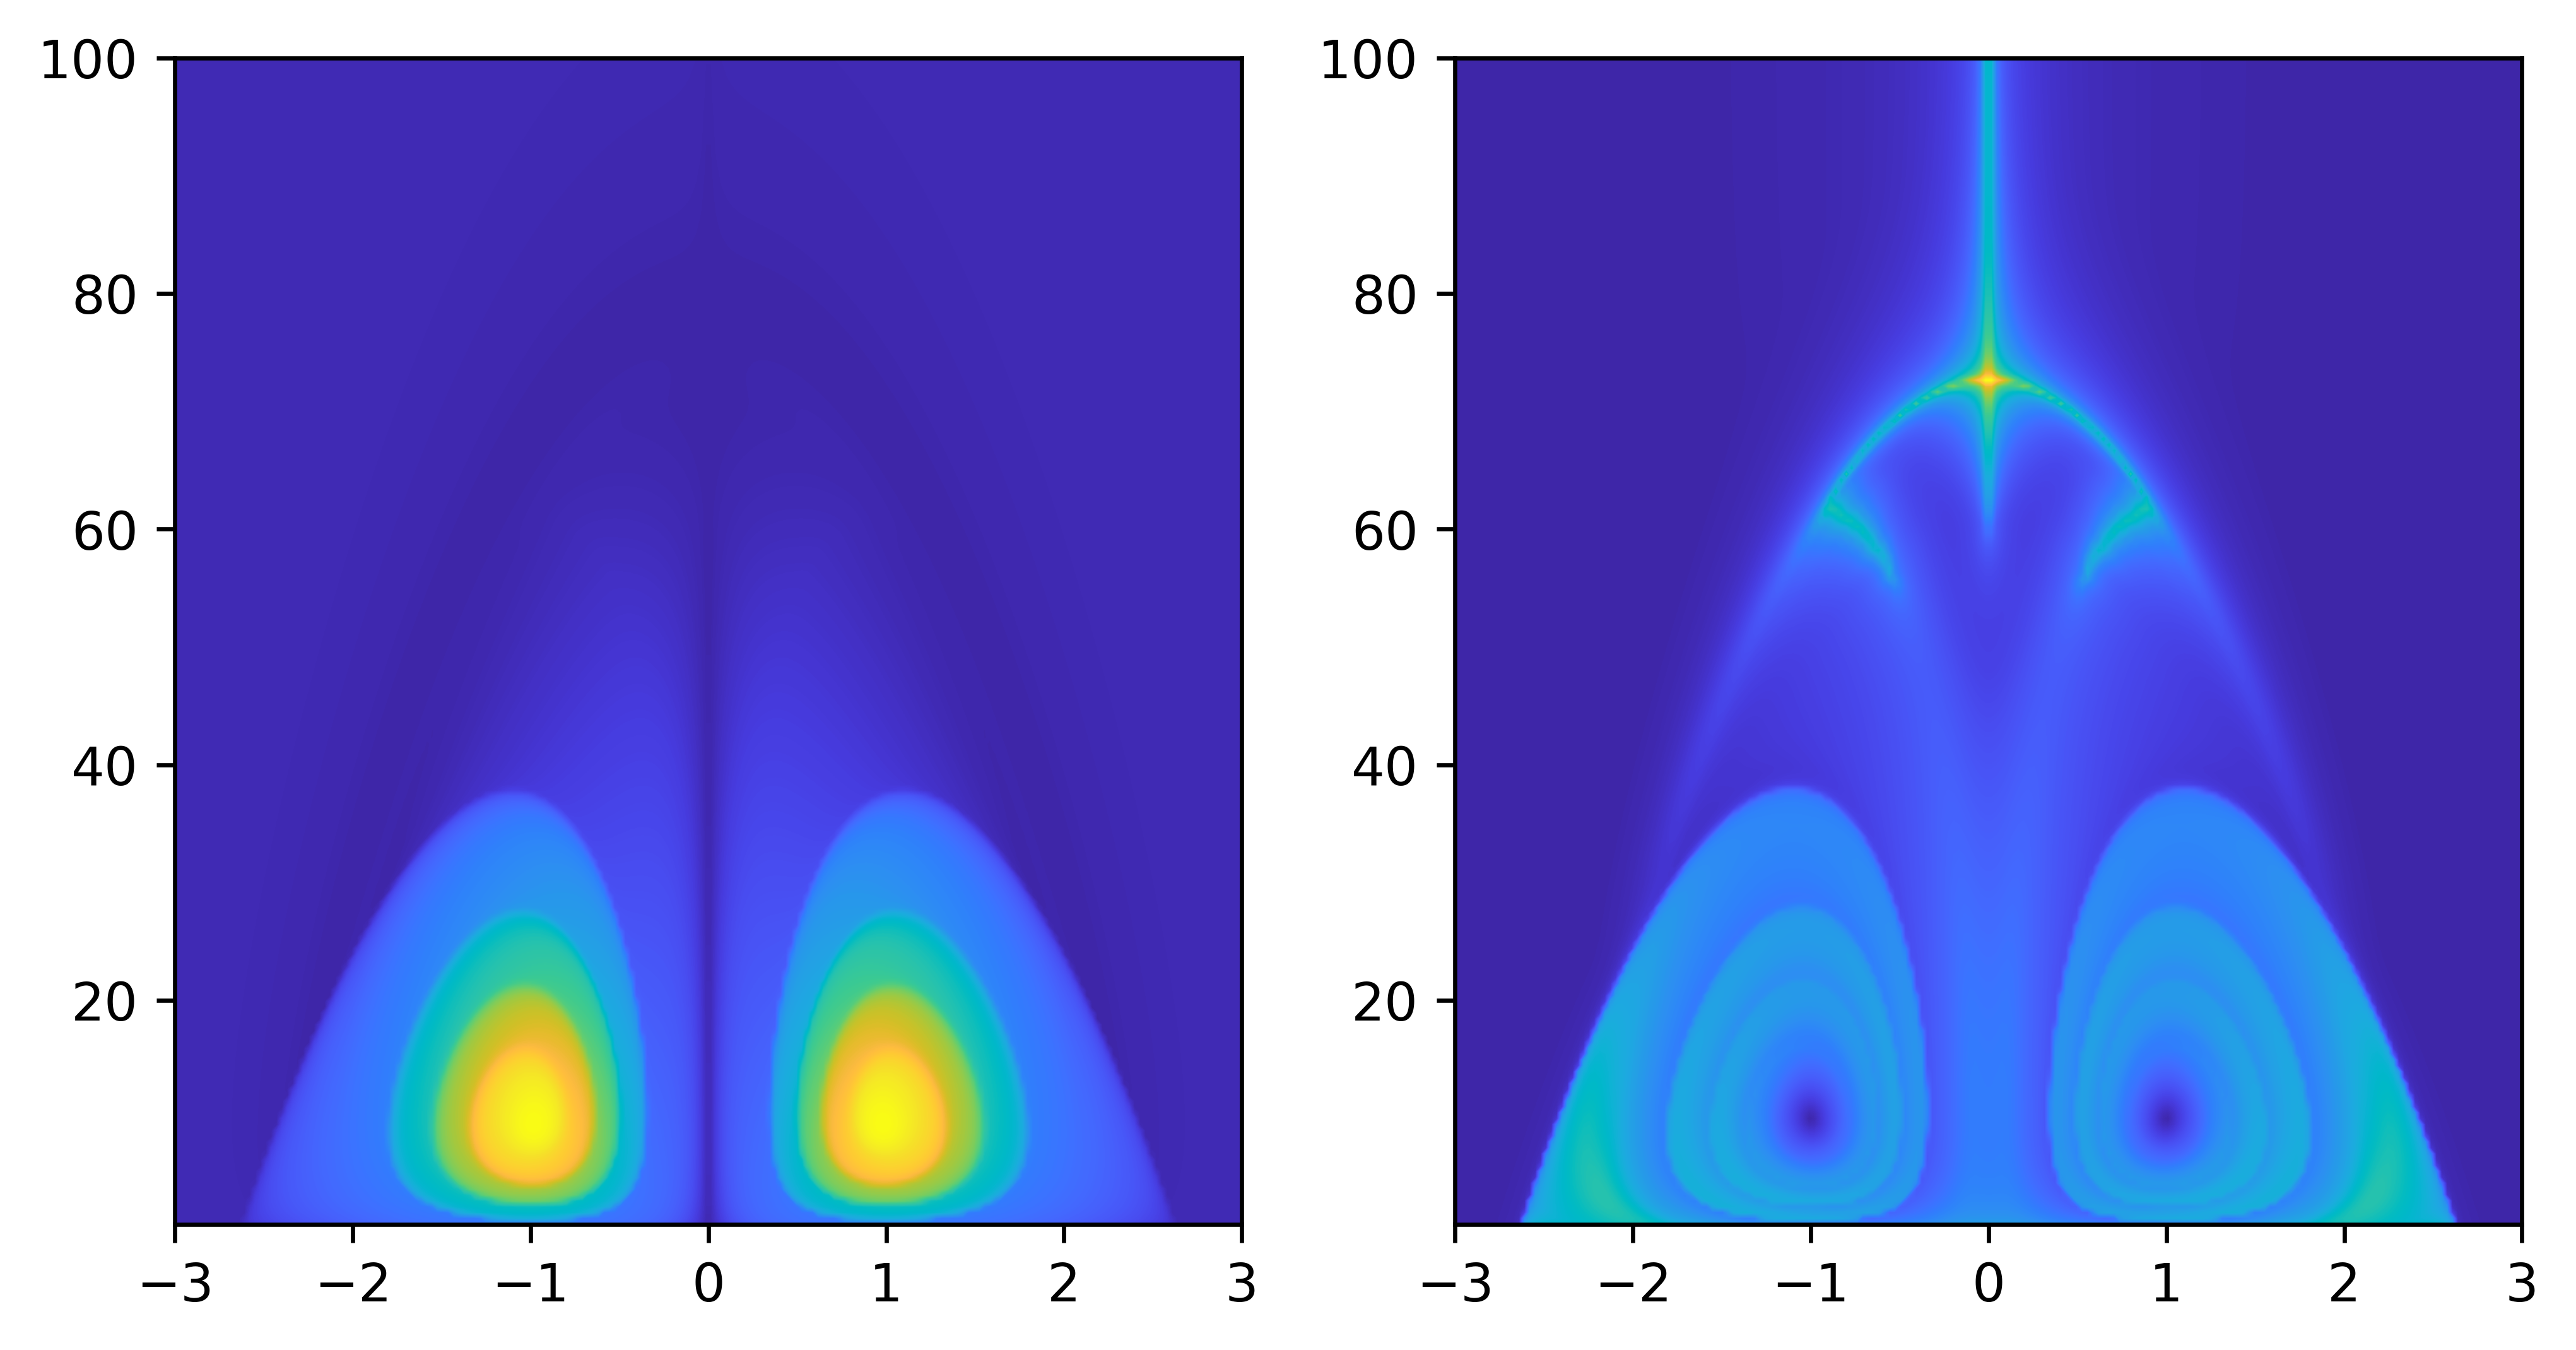

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (8, 4), dpi = 600)
cax0 = ax[0].contourf(x0, z0, ralpha.reshape(Nz, Nx).transpose(), levels = 500, cmap = parula_map)
cax1 = ax[1].contourf(x0, z0, rTSE.reshape(Nz, Nx).transpose(), levels = 500, cmap = parula_map)

#plt.colorbar(cax0, ax = ax[0])
#plt.colorbar(cax1, ax = ax[1])

plt.show()